In [32]:
# Necessary libraries loaded to load datasets, wrangle data, and perform some summarization and visualization
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

View and load the datasets: both appear to have a delimiter of "," so will use read_csv

In [2]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


After looking at some of the data, it appears that some data could use more specific types. For example, experience would be better as a factor type instead of a character. Although there were some missing data, they often occured in only one variable of the entire observation; the rest of the observations may still be useful. 

In [9]:
players_data <- players_data |>
  mutate(gender = as_factor(gender), 
         experience = as_factor(experience))
players_data

sessions_data <- sessions_data |>
  mutate(start_time = as_datetime(start_time),
         end_time = as_datetime(end_time))
sessions_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,1.71617e+12,1.71617e+12


2. Questions: From looking at this table and its variables, I formed my predictive question based on the broader question of interest to determine what "kinds" of players are most likely to contribute a large amount of data so that the research group can target those players in their recruiting efforts. The question I have formed is: Does age or experience positively affect the overall number of hours played?

In order to answer this question, I will need to to select only the age, experience, played_hours and do a colored scatter plot visualization to determine if there is a strong or weak trend between the variables. However, upon close look at look at the hours played, it appears that there are many observations with 0 hours played, as well as a few with very high values (e.g., over 150 hours) or very small amounts (e.g., 0.2 hours). This suggests that the data are skewed, with a small number of players contributing most of the total playtime. To better visualize this pattern and reduce the influence of extreme values, I will apply a logarithmic scale transformation to the played_hours variable. This will make it easier to identify whether there is any clear relationship between player age and engagement level through play time.

Now that the data is tidy, I can compute the mean values of quantitative data in the players dataset. 

In [38]:
mean_quantative <- summarize(players_data, 
                             mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
                             mean_age = round(mean(Age, na.rm = TRUE), 2))
                   
mean_quantative

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


1. Data description: After reading through the data carefully and computing its mean value, I better understand the two datasets and their variables. Most of the data in this survey other than the unique identifier and play time could be biased or inaccurate as they are based on survey results and self-ratings.  

The players.csv contains information on player demographics, information, and engagement and has 196 observations and 7 variables:
- The **experience** variable shows each player’s self-reported skill level split into 4 different categories: Amateur, Regular, Veteran, and Pro. This is best expressed as a Factor instead of the original Character type. Since these results were obtained from a survey and the users were told to rate their own skill level, some bias or inaccuracy may be present (for instance, a 9-year-old rated themselves as “Pro”).
- The **subscribe** variable is a Logical type, representing if each player has a subscription already. 
- The **hashedEmail** variable is a encripted unique player email and identifier, and is a character type.
- The **played_hours** variable shows the number of hours a player spent playing on the server in the form of a Double. However, upon closer inspection, this variable contains many players with 0 hours played, very high values (e.g., over 150 hours), as well as some extremely small values (e.g., 0.2 hours). This suggests that the data are highly skewed, with a few players contributing most of the total playtime. To address this, some logarithmic scaling or filtering may be needed to better interpret trends. The mean played hours of all players is 5.85 hours, rounded to two decimals.
- The **name** variable consists of a player's names and is a Character type.
- The **gender** variable included a player's gender: female, male, binary, other, two-spirited, or prefer not to say. There is so missing data as some people chose not to reveal their gender. This is better described as a Factor type rather than the original Character type. 
- The **Age** variable describes a player's age in years through the Double type. There is some missing data in the form of NA. The mean age of all players is 21.14 rounded to two decimal places. 

The sessions.csv contains information about individual play sessions for each player. Each row represents one session and includes data about the player, timing, and duration of play. It has 1535 observations and 5 variables:
- The **hashedEmail** variable is a unique identifier linking each playing session on the server to a specific player in the players.csv file. It is in the form of a Character.
- The **start_time** is a timestamp showing what time the player started the gaming session. It was originally a Character type but the Date type would suit it better. 
- The **end_time** is a timestamp showing what time the player ended the gaming session. It was originally a Character type, but the Date type would suit it better. There are a few missing values which could be due to the server time collection malfunctioning.
- The **original_start_time** is a Double representing the original Unix timestamp for when the session began.
- The **original_end_time** is a Double representing the original Unix timestamp for when the session ended. There are a few missing values which could be due to the server time collection malfunctioning.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


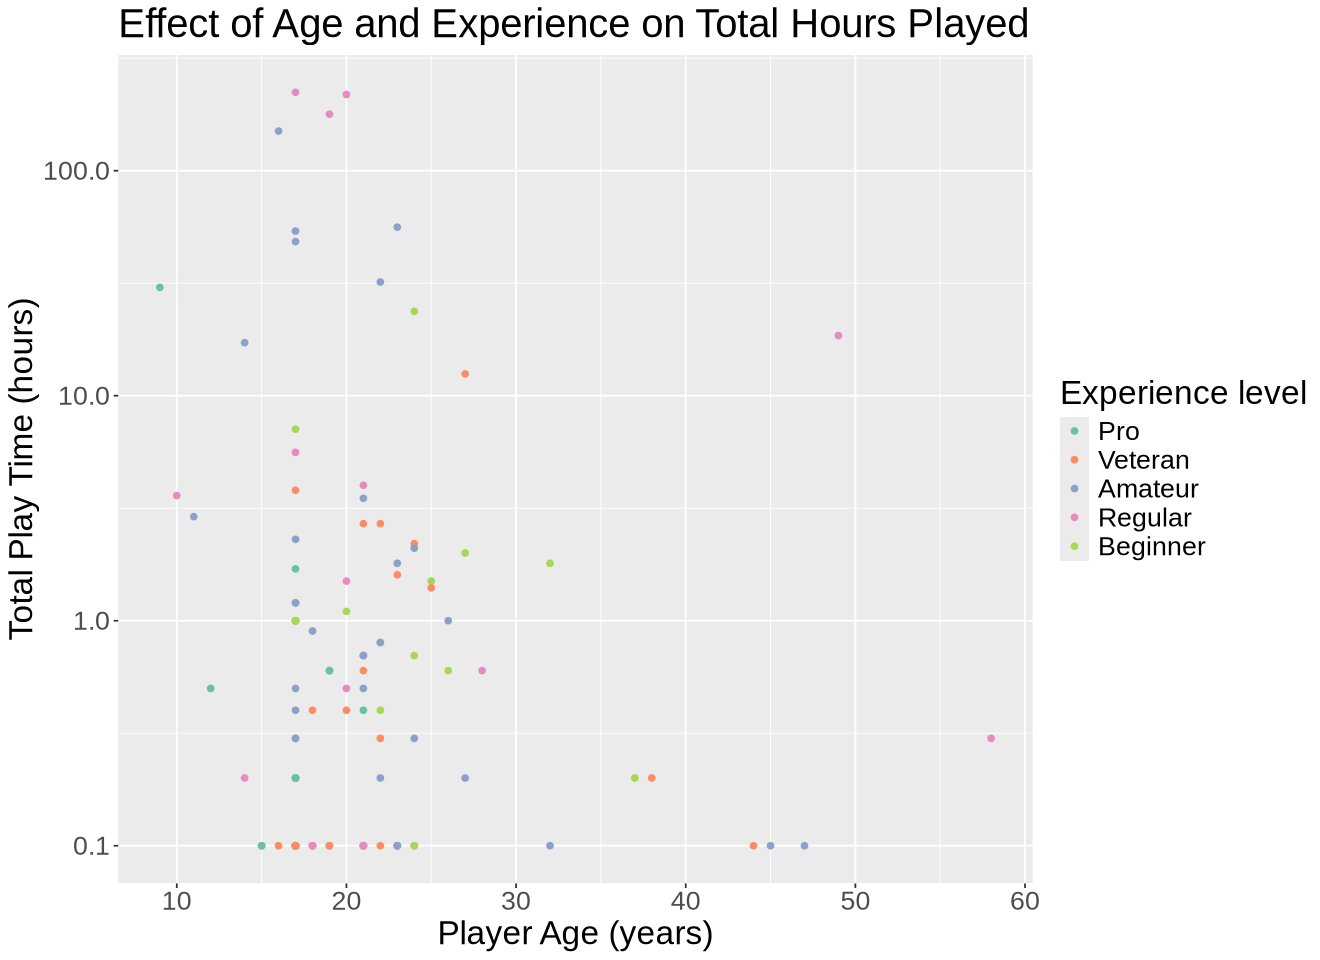

In [70]:
options(repr.plot.width = 11, repr.plot.height = 8)

no_zeroes <- players_data |>
  filter(played_hours > 0)

age_experience_effect <- no_zeroes |>
  ggplot(aes(x = Age, y = played_hours, color = experience)) +
         geom_point() +
         labs(x = "Player Age (years)",
              y = "Total Play Time (hours)",
              color = "Experience level",
              title = "Effect of Age and Experience on Total Hours Played") +
         scale_y_log10(labels = comma) +
         scale_color_brewer(palette = "Set2") +
         theme(text = element_text(size = 20))
possible_trend



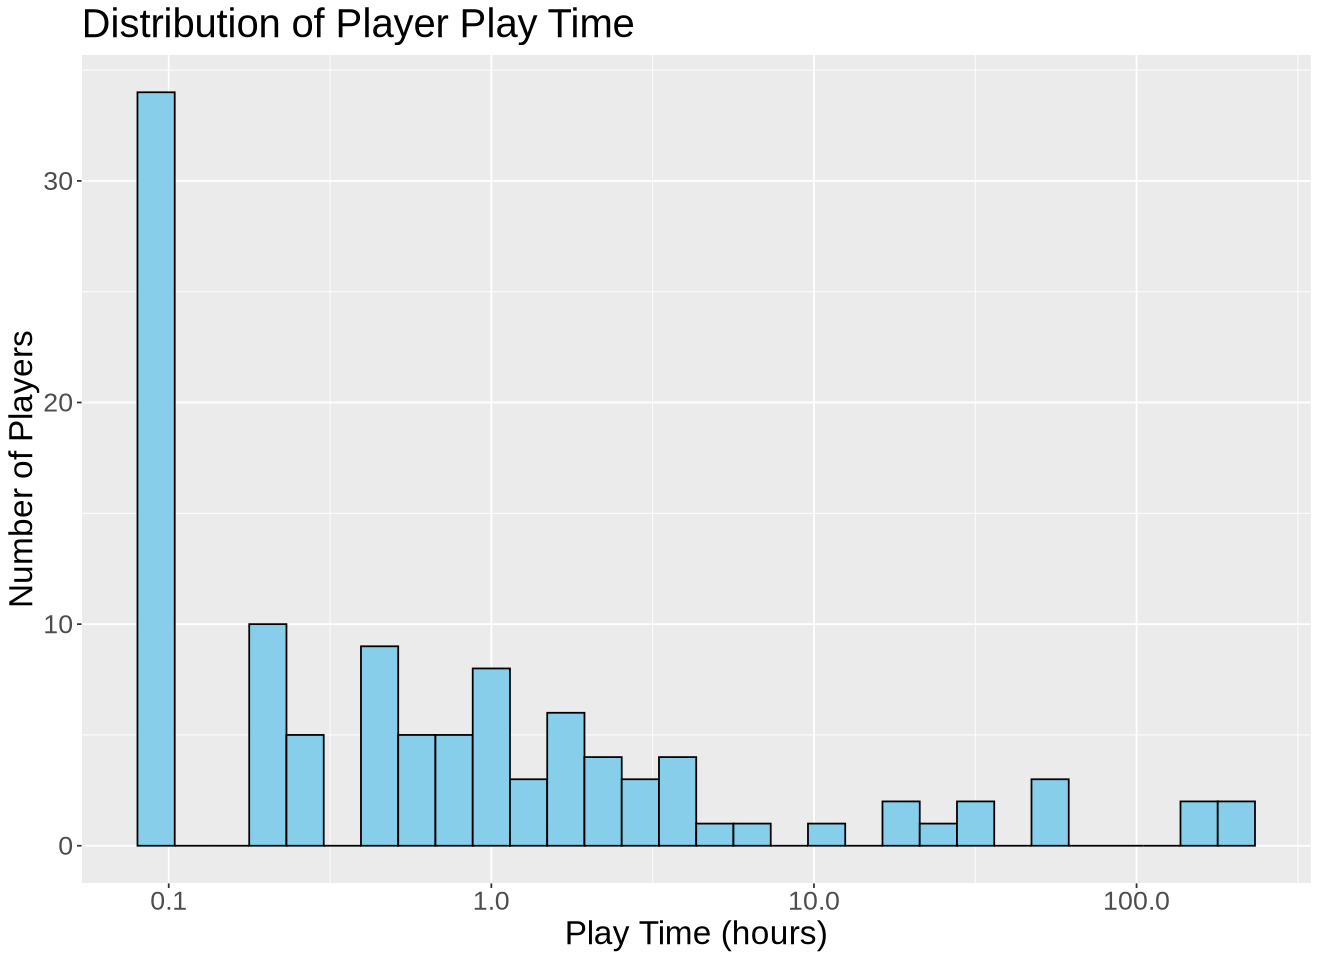

In [73]:
player_playtime_distrib <- no_zeroes |> 
  ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "black") +
    scale_x_log10() +
    labs(title = "Distribution of Player Play Time",
         x = "Play Time (hours)",
         y = "Number of Players") +
    theme(text = element_text(size = 20))
player_playtime_distrib

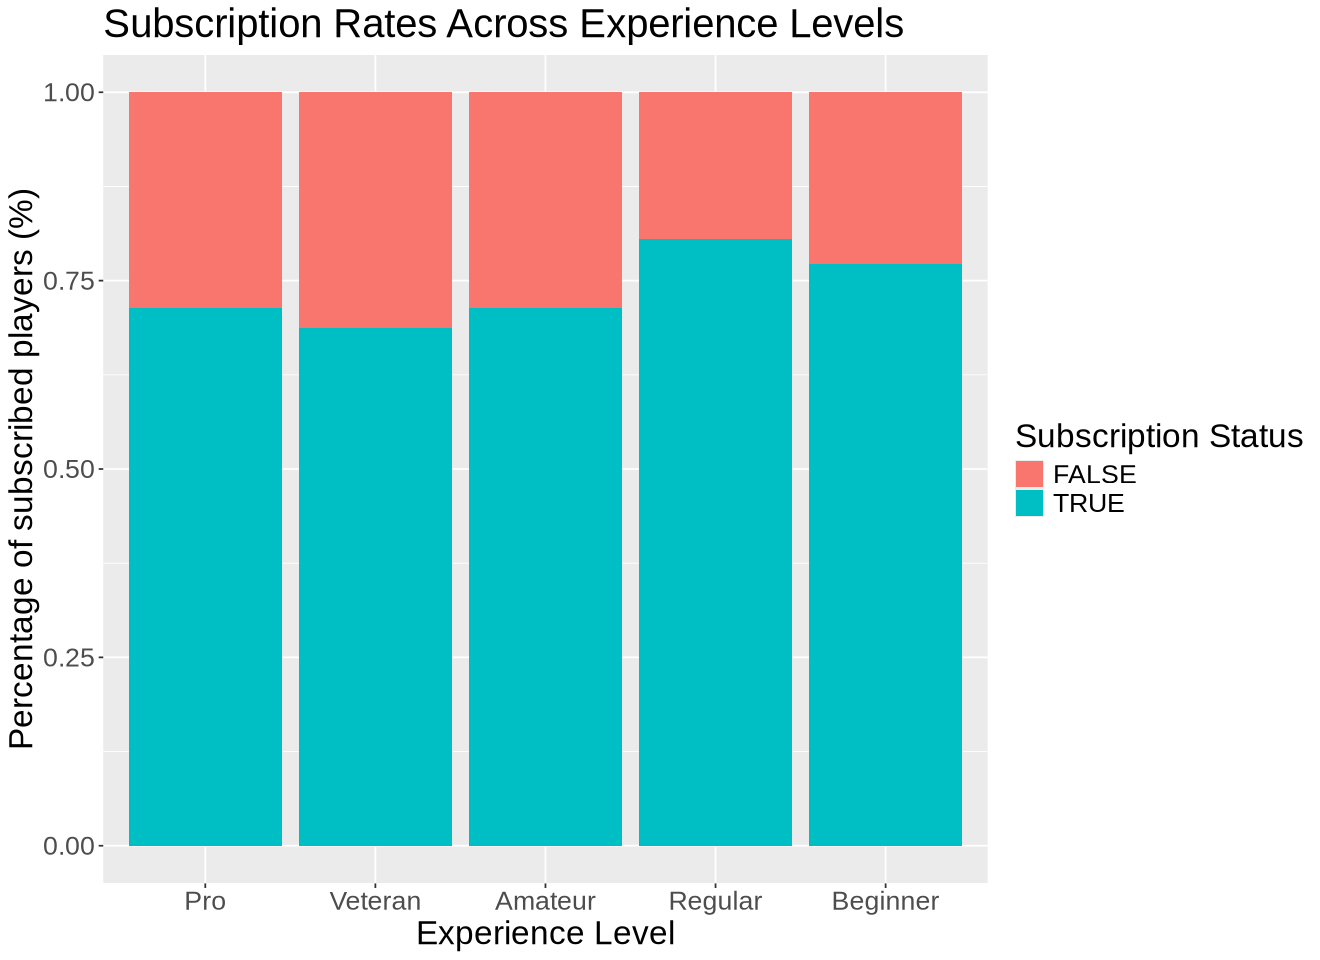

In [75]:
proportion_of_subs <- players_data |>
  ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Subscription Rates Across Experience Levels",
         x = "Experience Level",
         y = "Percentage of subscribed players (%)",
         fill = "Subscription Status") +
    scale_color_brewer(palette = "Set2") +
    theme(text = element_text(size = 20))

proportion_of_subs